In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import requests
import os
import numpy as np

pd.options.mode.chained_assignment = None
pd.set_option('display.max_rows', 200)

## Load Statistics

In [7]:
standings_df = pd.read_csv('../data/outputs/standings.csv')
standings_df.head()

,position,playedGames,form,won,draw,lost,points,goalsFor,goalsAgainst,goalDifference,team_short_name,team_group,competition
0,1,30,NaN,24,3,3,75,66,21,45,Napoli,0,Serie A
1,2,30,NaN,18,7,5,61,49,20,29,Lazio,0,Serie A
2,3,30,NaN,17,5,8,56,42,26,16,Roma,0,Serie A
3,4,30,NaN,15,8,7,53,49,37,12,Milan,0,Serie A
4,5,30,NaN,16,3,11,51,48,34,14,Inter,0,Serie A


In [8]:
matches_df = pd.read_csv('../data/outputs/matches.csv')
matches_df.head()

,main_team,opponent_team,goal_fatti,no_goal,goal,tot_goals,goal_subiti,away_home,result,team_has_scored,...,form,won,draw,lost,points,goalsFor,goalsAgainst,goalDifference,team_short_name,team_group
0,Milan,Udinese,4,False,True,6,2,home,Win,True,...,NaN,9,12,9,39,39,39,0,Udinese,1
1,Sampdoria,Atalanta,0,True,False,2,2,home,Loss,False,...,NaN,14,7,9,49,48,35,13,Atalanta,0
2,Lecce,Inter,1,False,True,3,2,home,Loss,True,...,NaN,16,3,11,51,48,34,14,Inter,0
3,Monza,Torino,1,False,True,3,2,home,Loss,True,...,NaN,10,9,11,39,31,36,-5,Torino,1
4,Fiorentina,Cremonese,3,False,True,5,2,home,Win,True,...,NaN,3,10,17,19,27,54,-27,Cremonese,2


In [9]:
win_draw_loss = pd.read_csv('../data/outputs/win_draw_loss.csv')
win_draw_loss.head()

,main_team,team_group,competition,n_matches,avg_win,avg_draw,avg_loss,win_streak_weighted,draw_streak_weighted,loss_streak_weighted,tot_giornata,win_streak_weighted_ratio,draw_streak_weighted_ratio,loss_streak_weighted_ratio
0,Almeria,0,La Liga,11,0.090909,0.090909,0.818182,24.0,17.0,134.0,175.0,0.137143,0.097143,0.765714
1,Almeria,1,La Liga,11,0.363636,0.090909,0.545455,33.0,28.0,85.0,146.0,0.226027,0.191781,0.582192
2,Almeria,2,La Liga,7,0.428571,0.571429,0.000000,62.0,62.0,0.0,124.0,0.500000,0.500000,0.000000
3,Almeria,all,La Liga,29,0.275862,0.206897,0.517241,119.0,107.0,219.0,445.0,0.267416,0.240449,0.492135
4,Arsenal,0,Premier League,9,0.666667,0.111111,0.222222,97.0,19.0,18.0,134.0,0.723881,0.141791,0.134328


In [10]:
win_draw_loss_away_home = pd.read_csv('../data/outputs/win_draw_loss_away_home.csv')
win_draw_loss_away_home.head()

,main_team,team_group,competition,away_home,n_matches,avg_win,avg_draw,avg_loss,win_streak_weighted,draw_streak_weighted,loss_streak_weighted,tot_giornata,win_streak_weighted_ratio,draw_streak_weighted_ratio,loss_streak_weighted_ratio
0,Almeria,0,La Liga,away,5,0.000000,0.000000,1.000000,0.0,0.0,70.0,70.0,0.000000,0.000000,1.000000
1,Almeria,0,La Liga,home,6,0.166667,0.166667,0.666667,24.0,17.0,64.0,105.0,0.228571,0.161905,0.609524
2,Almeria,1,La Liga,away,6,0.000000,0.166667,0.833333,0.0,28.0,80.0,108.0,0.000000,0.259259,0.740741
3,Almeria,1,La Liga,home,5,0.800000,0.000000,0.200000,33.0,0.0,5.0,38.0,0.868421,0.000000,0.131579
4,Almeria,2,La Liga,away,3,0.000000,1.000000,0.000000,0.0,35.0,0.0,35.0,0.000000,1.000000,0.000000


In [11]:
scored_conceded_goal_group = pd.read_csv('../data/outputs/team_scored_conceded_goal_group.csv')
scored_conceded_goal_group.head()

,main_team,team_group,competition,n_matches,team_has_scored,team_has_conceded_goal,team_has_scored_streak_weighted,team_has_conceded_goal_streak_weighted,tot_giornata,team_has_scored_streak_weighted_ratio,team_has_conceded_goal_streak_weighted_ratio,team_has_conceded_goal_ratio,team_has_scored_ratio
0,Almeria,0,La Liga,11,7,10,114.0,151.0,175.0,0.651429,0.862857,0.909091,0.636364
1,Almeria,1,La Liga,11,7,11,110.0,146.0,146.0,0.753425,1.000000,1.000000,0.636364
2,Almeria,2,La Liga,7,7,6,124.0,110.0,124.0,1.000000,0.887097,0.857143,1.000000
3,Almeria,all,La Liga,29,21,27,348.0,407.0,445.0,0.782022,0.914607,0.931034,0.724138
4,Arsenal,0,Premier League,9,8,7,115.0,95.0,134.0,0.858209,0.708955,0.777778,0.888889


In [12]:
no_goal_group = pd.read_csv('../data/outputs/no_goal_group.csv')
no_goal_group.head()

,n_matches,main_team,team_group,competition,no_goal,no_goal_streak_weighted,goal_streak_weighted,tot_giornata,no_goal_streak_weighted_ratio,goal_streak_weighted_ratio,no_goal_ratio,goal_ratio,curr_giornata,last_giornata
0,11,Augsburg,0,Bundesliga,3,27.0,126.0,153.0,0.176471,0.823529,0.272727,0.727273,28,28.0
1,11,Augsburg,1,Bundesliga,4,48.0,118.0,166.0,0.289157,0.710843,0.363636,0.636364,28,28.0
2,6,Augsburg,2,Bundesliga,3,42.0,45.0,87.0,0.482759,0.517241,0.500000,0.500000,28,28.0
3,28,Augsburg,all,Bundesliga,10,117.0,289.0,406.0,0.288177,0.711823,0.357143,0.642857,28,28.0
4,11,Bayern Munich,0,Bundesliga,4,67.0,100.0,167.0,0.401198,0.598802,0.363636,0.636364,28,28.0


In [13]:
no_goal_group_away_home = pd.read_csv('../data/outputs/no_goal_group_away_home.csv')
no_goal_group_away_home.head()

,main_team,team_group,away_home,competition,n_matches,no_goal,goal_streak_weighted,no_goal_streak_weighted,tot_giornata,goal_streak_weighted_ratio,no_goal_streak_weighted_ratio,no_goal_ratio,goal_ratio
0,Almeria,0,away,La Liga,5,2,50.0,20.0,70.0,0.714286,0.285714,0.4,0.6
1,Almeria,0,home,La Liga,6,3,40.0,65.0,105.0,0.380952,0.619048,0.5,0.5
2,Almeria,1,away,La Liga,6,3,77.0,31.0,108.0,0.712963,0.287037,0.5,0.5
3,Almeria,1,home,La Liga,5,1,33.0,5.0,38.0,0.868421,0.131579,0.2,0.8
4,Almeria,2,away,La Liga,3,0,35.0,0.0,35.0,1.000000,0.000000,0.0,1.0


In [14]:
n_goal_group = pd.read_csv('../data/outputs/num_goals_group.csv')
n_goal_group.head()

,main_team,team_group,competition,n_matches,avg_goal_fatti,avg_goal_subiti
0,Almeria,0,La Liga,11,0.727273,2.090909
1,Almeria,1,La Liga,11,1.454545,1.818182
2,Almeria,2,La Liga,7,1.571429,1.000000
3,Almeria,all,La Liga,29,1.206897,1.724138
4,Arsenal,0,Premier League,9,2.222222,1.555556


## Exploration

#### Teams with highest delta average goals for-against

In [19]:
dd = n_goal_group[n_goal_group.team_group=='all']
dd['delta_goal'] = dd['avg_goal_fatti'] - dd['avg_goal_subiti']
dd.sort_values('delta_goal', ascending=False)\
    [['main_team','competition','n_matches','avg_goal_fatti','avg_goal_subiti','delta_goal']].head(10)

,main_team,competition,n_matches,avg_goal_fatti,avg_goal_subiti,delta_goal
35,Bayern Munich,Bundesliga,28,2.785714,1.071429,1.714286
183,Man City,Premier League,30,2.600000,0.933333,1.666667
31,Barcelona,La Liga,29,1.827586,0.310345,1.517241
199,Napoli,Serie A,30,2.200000,0.700000,1.500000
7,Arsenal,Premier League,31,2.387097,1.000000,1.387097
219,Real Madrid,La Liga,29,2.103448,0.827586,1.275862
147,Lazio,Serie A,30,1.633333,0.666667,0.966667
23,Ath Madrid,La Liga,29,1.620690,0.724138,0.896552
83,Dortmund,Bundesliga,28,2.214286,1.392857,0.821429
203,Newcastle,Premier League,30,1.600000,0.800000,0.800000


#### Teams with highest delta average goals for-against, with top tier teams in their championship

In [20]:
dd = n_goal_group[n_goal_group.team_group=='0']
dd['delta_goal'] = dd['avg_goal_fatti'] - dd['avg_goal_subiti']
dd.sort_values('delta_goal', ascending=False)\
    [['main_team','competition','n_matches','avg_goal_fatti','avg_goal_subiti','delta_goal']].head(10)

,main_team,competition,n_matches,avg_goal_fatti,avg_goal_subiti,delta_goal
32,Bayern Munich,Bundesliga,11,2.636364,0.909091,1.727273
28,Barcelona,La Liga,9,2.111111,0.666667,1.444444
180,Man City,Premier League,10,2.600000,1.500000,1.100000
4,Arsenal,Premier League,9,2.222222,1.555556,0.666667
144,Lazio,Serie A,10,1.500000,0.900000,0.600000
196,Napoli,Serie A,10,1.600000,1.100000,0.500000
164,Liverpool,Premier League,12,2.166667,1.666667,0.500000
80,Dortmund,Bundesliga,11,1.909091,1.454545,0.454545
188,Milan,Serie A,9,1.666667,1.333333,0.333333
216,Real Madrid,La Liga,10,1.400000,1.100000,0.300000


#### Teams with highest NO GOAL percentage of matches

In [21]:
no_goal_group[no_goal_group.team_group=='all'].sort_values('no_goal_ratio', ascending=False)\
    [['main_team','competition','n_matches','no_goal','no_goal_ratio']].head(10)

,main_team,competition,n_matches,no_goal,no_goal_ratio
87,Barcelona,La Liga,29,23,0.793103
179,Juventus,Serie A,30,22,0.733333
183,Lazio,Serie A,30,20,0.666667
119,Mallorca,La Liga,29,19,0.655172
95,Cadiz,La Liga,29,19,0.655172
143,Valladolid,La Liga,29,18,0.620690
79,Ath Bilbao,La Liga,29,18,0.620690
151,Villarreal,La Liga,29,18,0.620690
211,Sampdoria,Serie A,30,18,0.600000
203,Roma,Serie A,30,18,0.600000


#### Teams with highest percentage of GOAL matches

In [22]:
no_goal_group[no_goal_group.team_group=='all'].sort_values('goal_ratio', ascending=False)\
    [['main_team','competition','n_matches','no_goal','goal_ratio']].head(10)

,main_team,competition,n_matches,no_goal,goal_ratio
107,Espanol,La Liga,29,7,0.758621
115,Girona,La Liga,29,9,0.689655
19,Ein Frankfurt,Bundesliga,28,9,0.678571
67,Werder Bremen,Bundesliga,28,9,0.678571
59,Stuttgart,Bundesliga,28,9,0.678571
75,Almeria,La Liga,29,10,0.655172
3,Augsburg,Bundesliga,28,10,0.642857
47,Mainz,Bundesliga,28,10,0.642857
7,Bayern Munich,Bundesliga,28,10,0.642857
35,Hoffenheim,Bundesliga,28,10,0.642857


#### Teams with highest percentage of GOAL Streak matches

In [23]:
no_goal_group[no_goal_group.team_group=='all']\
        .sort_values('goal_streak_weighted_ratio', ascending=False)\
        [['main_team','competition','n_matches',\
          'no_goal','goal_streak_weighted_ratio']].head(10)

,main_team,competition,n_matches,no_goal,goal_streak_weighted_ratio
107,Espanol,La Liga,29,7,0.820225
3,Augsburg,Bundesliga,28,10,0.711823
75,Almeria,La Liga,29,10,0.696629
7,Bayern Munich,Bundesliga,28,10,0.692118
67,Werder Bremen,Bundesliga,28,9,0.689655
19,Ein Frankfurt,Bundesliga,28,9,0.682266
47,Mainz,Bundesliga,28,10,0.679803
15,Dortmund,Bundesliga,28,12,0.677340
59,Stuttgart,Bundesliga,28,9,0.672414
35,Hoffenheim,Bundesliga,28,10,0.672414


#### Teams with highest percentage of NO GOAL Streak matches

In [24]:
no_goal_group[no_goal_group.team_group=='all']\
    .sort_values('no_goal_streak_weighted_ratio', ascending=False)\
    [['main_team','competition','n_matches','no_goal','no_goal_streak_weighted_ratio']].head(20)

,main_team,competition,n_matches,no_goal,no_goal_streak_weighted_ratio
87,Barcelona,La Liga,29,23,0.805804
183,Lazio,Serie A,30,20,0.724731
179,Juventus,Serie A,30,22,0.720430
199,Napoli,Serie A,30,18,0.701075
119,Mallorca,La Liga,29,19,0.676404
135,Sociedad,La Liga,29,17,0.667416
95,Cadiz,La Liga,29,19,0.640449
203,Roma,Serie A,30,18,0.621505
167,Empoli,Serie A,30,17,0.602151
139,Valencia,La Liga,29,16,0.597753


#### Teams with imporvements in NO GOAL looking at recent trends

In [25]:
dd = no_goal_group[no_goal_group.team_group=='all']
dd['no_goal_streak_delta'] = (dd['no_goal_streak_weighted_ratio'] - dd['no_goal_ratio'])* 100 / dd['no_goal_ratio']
dd = dd[dd['no_goal_streak_weighted_ratio']>0.6]
dd.sort_values('no_goal_streak_delta', ascending=False)\
    [['main_team','competition','n_matches',\
      'no_goal_streak_weighted_ratio','no_goal_streak_delta','no_goal_ratio']].head(10)

,main_team,competition,n_matches,no_goal_streak_weighted_ratio,no_goal_streak_delta,no_goal_ratio
199,Napoli,Serie A,30,0.701075,16.845878,0.600000
135,Sociedad,La Liga,29,0.667416,13.853272,0.586207
183,Lazio,Serie A,30,0.724731,8.709677,0.666667
167,Empoli,Serie A,30,0.602151,6.261860,0.566667
203,Roma,Serie A,30,0.621505,3.584229,0.600000
119,Mallorca,La Liga,29,0.676404,3.240686,0.655172
87,Barcelona,La Liga,29,0.805804,1.601320,0.793103
179,Juventus,Serie A,30,0.720430,-1.759531,0.733333
95,Cadiz,La Liga,29,0.640449,-2.247191,0.655172


#### Teams with imporvements in WINS looking at recent trends

In [26]:
dd = win_draw_loss[win_draw_loss.team_group=='all']
dd = dd[dd.avg_win > 0.2]
dd['win_streak_weighted_delta'] = (dd['win_streak_weighted_ratio'] - dd['avg_win'])* 100 / dd['avg_win']
dd.sort_values('win_streak_weighted_delta', ascending=False)\
    [['main_team','competition','n_matches',\
      'win_streak_weighted_ratio','win_streak_weighted_delta','avg_win']].head(10)

,main_team,competition,n_matches,win_streak_weighted_ratio,win_streak_weighted_delta,avg_win
311,Wolves,Premier League,31,0.377510,30.031236,0.290323
243,Sevilla,La Liga,29,0.388764,25.268414,0.310345
163,Leverkusen,Bundesliga,28,0.573892,23.607427,0.464286
51,Bournemouth,Premier League,31,0.353414,21.731370,0.290323
11,Aston Villa,Premier League,31,0.584337,20.763052,0.483871
63,Cadiz,La Liga,29,0.287640,19.165329,0.241379
47,Bologna,Serie A,30,0.473118,18.279570,0.400000
235,Sassuolo,Serie A,30,0.432258,17.888563,0.366667
127,Girona,La Liga,29,0.397753,15.348315,0.344828
43,Bochum,Bundesliga,28,0.327586,14.655172,0.285714


#### Best Improving Defenses

In [27]:
dd = matches_df[['main_team','goal_subiti','giornata','competition']]
dd1 = dd.groupby(['main_team','competition'])\
    .mean().reset_index()\
    .rename(columns={"goal_subiti":"avg_goal_subiti"})
dd['goal_subiti_weighted'] = dd['goal_subiti']*dd['giornata']
dd2 = dd.groupby(['main_team','competition'])\
    .sum().reset_index()\
    .rename(columns={"giornata":"tot_giornata"})
dd3 = dd1.merge(dd2, on=['main_team','competition'])
dd3['goal_subiti_weighted_ratio'] = dd3['goal_subiti_weighted']/dd3['tot_giornata']
dd3['goal_subiti_weighted_ratio_delta'] = dd3['avg_goal_subiti'] - dd3['goal_subiti_weighted_ratio']
dd3.sort_values('goal_subiti_weighted_ratio_delta', ascending=False).head()

,main_team,competition,avg_goal_subiti,giornata,goal_subiti,tot_giornata,goal_subiti_weighted,goal_subiti_weighted_ratio,goal_subiti_weighted_ratio_delta
10,Bochum,Bundesliga,2.178571,14.500000,61,406.0,779.0,1.918719,0.259852
72,Verona,Serie A,1.433333,15.500000,43,465.0,561.0,1.206452,0.226882
40,Leverkusen,Bundesliga,1.464286,14.500000,41,406.0,505.0,1.243842,0.220443
11,Bologna,Serie A,1.233333,15.500000,37,465.0,471.0,1.012903,0.220430
16,Celta,La Liga,1.379310,15.344828,40,445.0,516.0,1.159551,0.219760


##### Focus on teams with less than 1 goals conceded on average

In [28]:
dd3 = dd3[dd3.goal_subiti_weighted_ratio < 1]
dd3.sort_values('goal_subiti_weighted_ratio_delta', ascending=False).head()

,main_team,competition,avg_goal_subiti,giornata,goal_subiti,tot_giornata,goal_subiti_weighted,goal_subiti_weighted_ratio,goal_subiti_weighted_ratio_delta
34,Inter,Serie A,1.133333,15.500000,34,465.0,464.0,0.997849,0.135484
27,Fiorentina,Serie A,1.100000,15.500000,33,465.0,456.0,0.980645,0.119355
5,Ath Madrid,La Liga,0.724138,15.344828,21,445.0,279.0,0.626966,0.097172
61,Sociedad,La Liga,0.965517,15.344828,28,445.0,391.0,0.878652,0.086866
36,Lazio,Serie A,0.666667,15.500000,20,465.0,279.0,0.600000,0.066667


<Axes: title={'center': 'Average Goal Subiti Overtime - Ath Madrid'}>

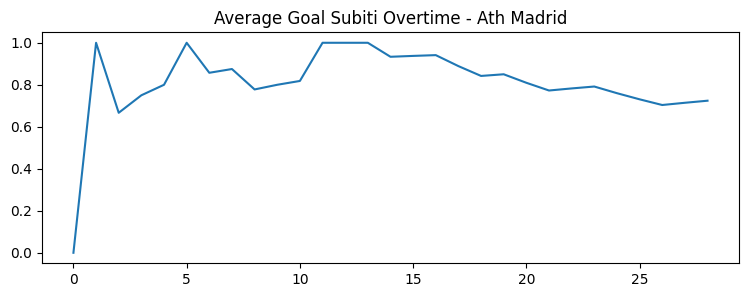

In [29]:
team = 'Ath Madrid'
matches_df[(matches_df.main_team==f"{team}")]\
        .sort_values('giornata')\
        .goal_subiti.expanding()\
        .mean().reset_index()\
        .goal_subiti.plot(kind='line', title=f"Average Goal Subiti Overtime - {team}",\
                          figsize=(9,3))

### NoGoal trends for single team

In [88]:
n_matches_in_grps = 5
matches_df['giornata_grp'] = matches_df.giornata.apply(lambda x: int(x/n_matches_in_grps))

In [98]:
team_matches = matches_df[matches_df.main_team=='Inter']

<Axes: >

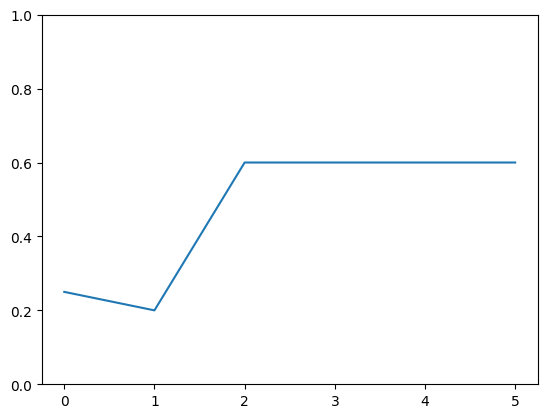

In [99]:
dd = team_matches[['giornata','giornata_grp','no_goal']]\
        .groupby('giornata_grp')\
        .agg(
            no_goal=('no_goal', 'mean'),
            giornata=('giornata', 'count')
        )
dd = dd[dd.giornata > (n_matches_in_grps - 2)]
dd.no_goal\
    .reset_index()\
    .no_goal\
    .plot(kind='line', ylim=(0,1))

#### Just checking the actual matches

In [163]:
matches_df[(matches_df.main_team=='Real Madrid')&(matches_df.away_home=='away')]\
          .sort_values('giornata')\
        [['main_team','opponent_team','away_home','no_goal',
          'goal_fatti','goal_subiti','giornata','team_group']]

,main_team,opponent_team,away_home,no_goal,goal_fatti,goal_subiti,giornata,team_group
1304,Real Madrid,Almeria,away,False,2,1,1.0,2
1312,Real Madrid,Celta,away,False,4,1,2.0,1
1325,Real Madrid,Espanol,away,False,3,1,3.0,2
1357,Real Madrid,Ath Madrid,away,False,2,1,6.0,0
1372,Real Madrid,Getafe,away,True,1,0,8.0,2
1394,Real Madrid,Elche,away,True,3,0,10.0,2
1427,Real Madrid,Vallecano,away,False,2,3,13.0,1
1444,Real Madrid,Valladolid,away,True,2,0,15.0,2
1450,Real Madrid,Villarreal,away,False,1,2,16.0,0
1475,Real Madrid,Ath Bilbao,away,True,2,0,18.0,0
